# Flexible representation for quantum images (FRQI)

Flexible representation for quantum images (**FRQI**)is an image representation in the form of a standardized state on a quantum computer. With **FRQI**s, color information is encoded as a normalized state which is then used to represent images on quantum computers.The FRQI compiles and converts color information and position information of image into a quantum state according to the method of classical image representation [1] The goal of the Flexible Representation of Quantum Images (FRQI) is to provide a quantum representation of images that allows an efficient encoding of the classical data into a quantum state and the  subsequent use of operators for image processing operations. 

The FRQI is capable of capturing image colours and their corresponding positions in a quantum state, and a quantum circuit using Hadamard gates and controlled rotation gates is suggested for the transform.
 
## The FRQI State

The quantum state representing the image is:

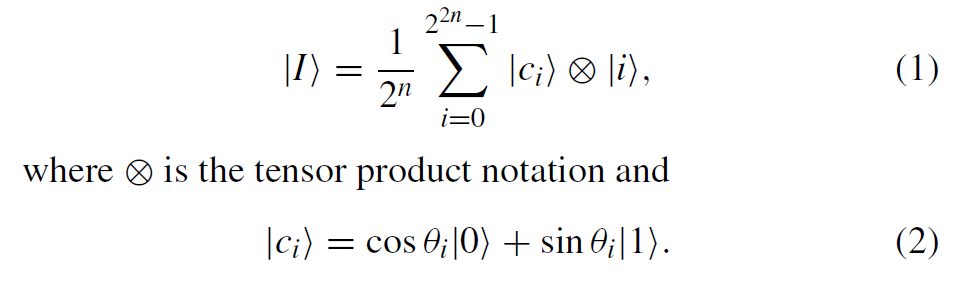

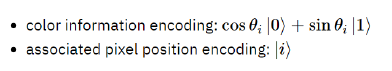


## Building the FRQI State:

From an initialized state **|0⟩⊗2n+1** to the FRQI state is in full superposition, except for the last qubit which encoded the colour. **H⊗2n** being the tensor product of **2n** Hadamard operations, intermediate state is:

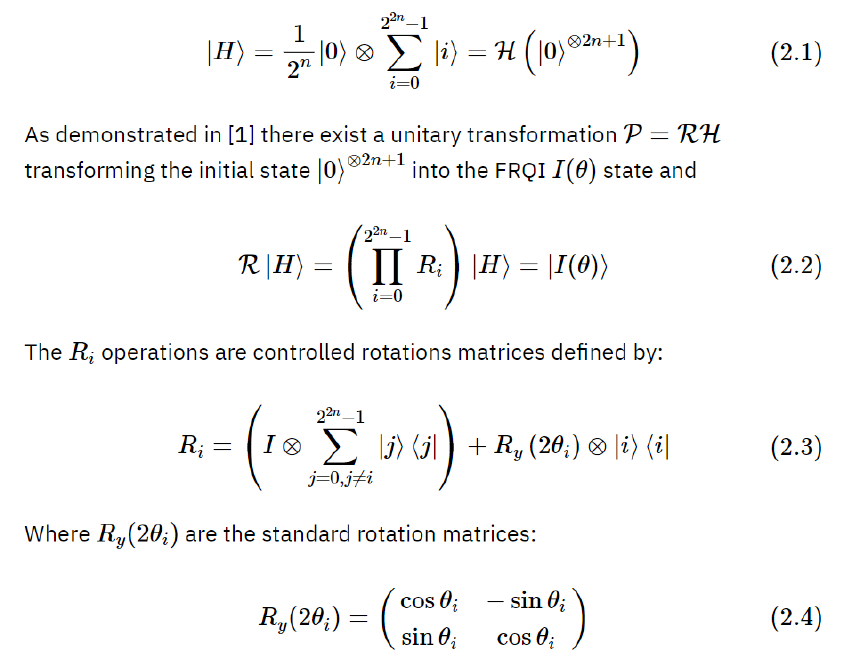

## Implementation

all angles **θi** equal to **0** means that all the pixels are black, if all **θi** values are equal to **π/2** then all the pixels are white, and so on.

**θi=π/2**, all pixels at maximum intensity

The code will use the qiskit SDK from IBM.

In [2]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


## Import the modules and tools needed for the work


In [3]:
import numpy as np
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

## FRQI Quantum Circuit
In the implementation of the FRQI we could simplify the process by dividing it in just 3 parts.

1. The superposition of the pixel position qubits.
2. The use of X-gates to change the pixel position qubits.
3. The application of the rotational gates.

### Superposition of qubits

Applying the hadamard gate in all the qubits:

In [5]:
pi = 3.14
theta1 = 0
theta2 = pi/2 # all pixels black
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)

qc.barrier()

### Change of pixels
The implementation of the FRQI needs to implement a 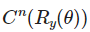 gate for al the pixels in the image.

#### Application of Gates

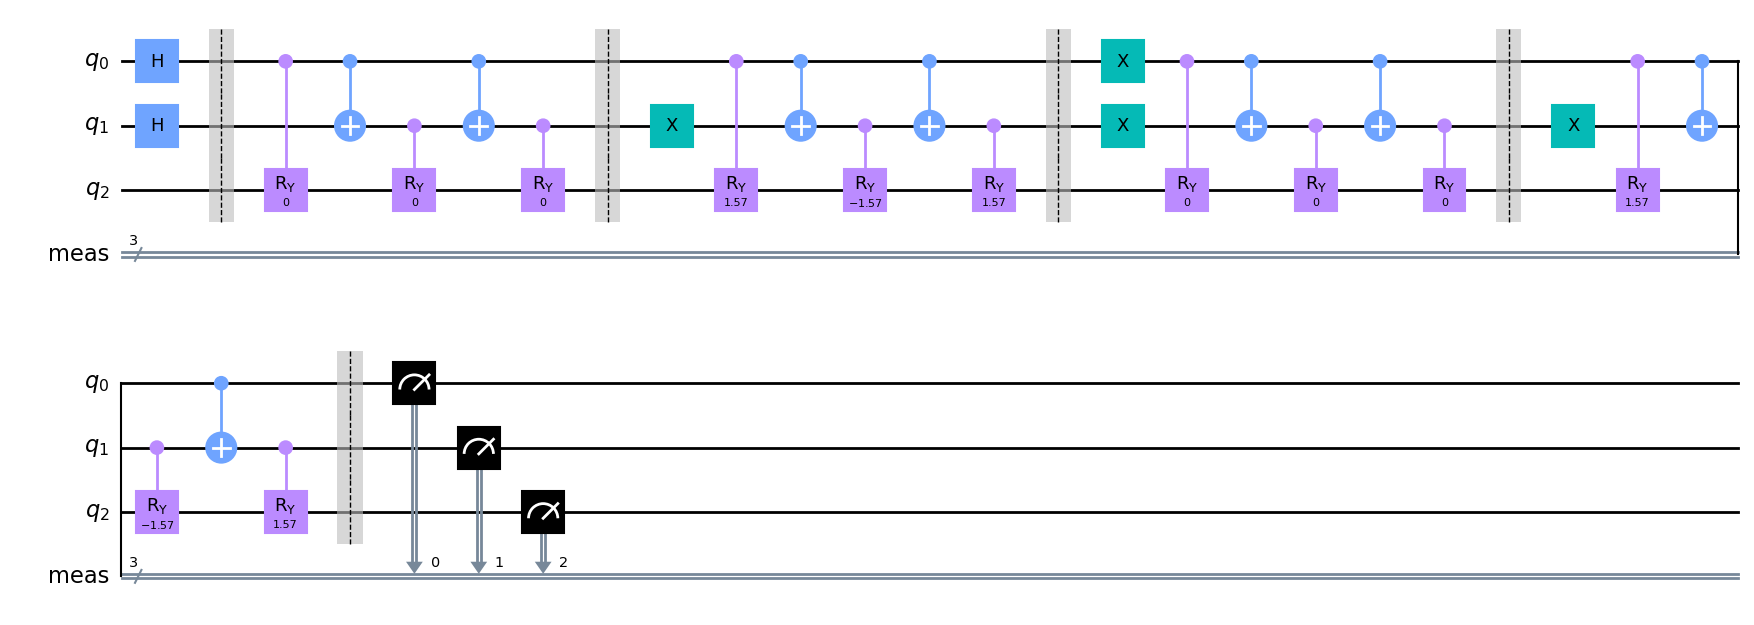

In [6]:
#Pixel 1

qc.cry(theta1,0,2)
qc.cx(0,1)
qc.cry(-theta1,1,2)
qc.cx(0,1)
qc.cry(theta1,1,2)

qc.barrier()

#Pixel 2

qc.x(1)
qc.cry(theta2,0,2)
qc.cx(0,1)
qc.cry(-theta2,1,2)
qc.cx(0,1)
qc.cry(theta2,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta1,0,2)
qc.cx(0,1)
qc.cry(-theta1,1,2)
qc.cx(0,1)
qc.cry(theta1,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta2,0,2)
qc.cx(0,1)
qc.cry(-theta2,1,2)
qc.cx(0,1)
qc.cry(theta2,1,2)

qc.measure_all()

qc.draw(output='mpl')

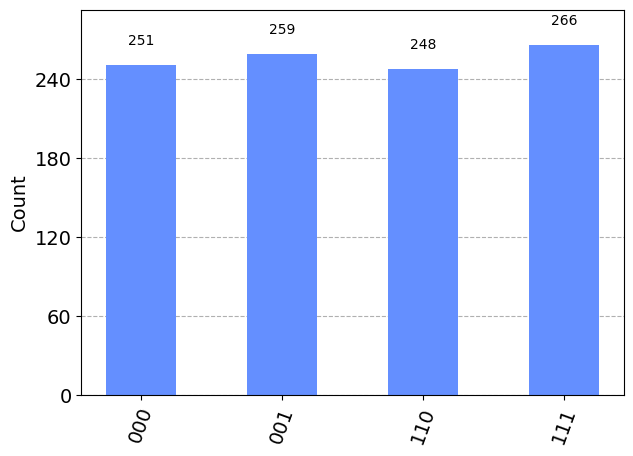

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

results = job.result()
plot_histogram(results.get_counts(qc))

### Reference:

[1] Su, J., Guo, X., Liu, C., & Li, L. (Year). A New Trend of Quantum Image Representations. Journal Name, Volume(Issue), Page numbers. DOI: 10.1109/ACCESS.2020.3039996

[2] Z. Boreiri, A. N. Azad and N. Majd, "Optimized Quantum Circuits in Quantum Image Processing Using Qiskit," 2022 International Conference on Machine Vision and Image Processing (MVIP), Ahvaz, Iran, Islamic Republic of, 2022, pp. 1-7, doi: 10.1109/MVIP53647.2022.9738550.